In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('svg')

import pandas as pd
import numpy as np
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

## Discrete V/s continuous functions

For optimization problems, continuous functions perform better. 

* Step function - **Discrete function**.
* Sigmoid function - **Continuous function**.

### Step function (Discrete)

Step function is defined as,

$$
y =
\left\{
\begin{array}{ll}
1 & \mbox{if $x\geq 0$},\\
0 & \mbox{if $x \lt 0$},\\
\end{array}
\right.
$$


![Step function](perceptron-step.svg)

### Sigmoid function (Continuous)

Sigmoid function is defined as,

$$
y = \frac{1}{1 + e^{-x}}
$$

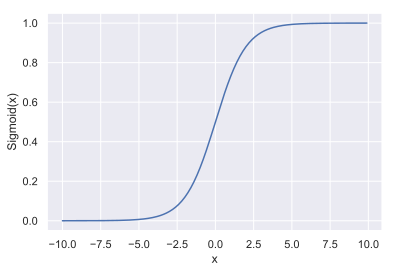

In [2]:
def sigmoid(x):
    """Sigmoid function"""
    return 1 / (1 + np.exp(-x))

x = np.arange(-10, 10, 0.1)
y = sigmoid(x)

plt.xlabel("x"); plt.ylabel("Sigmoid(x)")
plt.plot(x, y)

## Softmax function

In case of **Multi-class Classification**, Sigmoid function won't work. Sigmoid function can only perform binary classification (Yes/No, 1/0, Class 1/Class 2). If there are 3 or more classes, softmax function is useful.

For example, in **Sigmoid function**

* `P(Interview offer) = 0.6` => `P(No Interview offer) = 0.4`
* `score(Interview) = Linear function (our model)`
* `P(Interview offer) = sigmoid(score)`

In case of **Multi-class** (say 3)

* If the scores are as follows
    * `Score(Class 1) = 2`
    * `Score(Class 2) = 1`
    * `Score(Class 3) = 0`
    
How to turn the scores into probabilities? We can apply **softmax** for the scores $z_1, z_2, ... z_n$ as follows,

$$
P(Class-i) = \frac{e^{z_i}}{e^{z_1} + e^{z_2} + ... + e^{z_n}}
$$

In [3]:
def softmax(scores):
    """Softmax function"""
    expz = np.exp(scores)
    return np.divide(expz, np.sum(expz))

softmax([1, 2, 3])

array([0.09003057, 0.24472847, 0.66524096])

## One-hot encoding

One-hot encoding turns the following table,

| Applicant's degree | Categorical value | Salary |
|--------------------|-------------------|--------|
| Bachelor           | 0                 | 1200   |
| Master             | 1                 | 1750   |
| Master             | 1                 | 2000   |
| Doctorate          | 2                 | 3500   |
| Bachelor           | 0                 | 1400   |

into,

| Bachelor? | Master? | Dcotorate? | Salary |
|-----------|---------|------------|--------|
| 1         | 0       | 0          | 1200   |
| 0         | 1       | 0          | 1750   |
| 0         | 1       | 0          | 2000   |
| 0         | 0       | 1          | 3500   |
| 1         | 0       | 0          | 1400   |

Converting categorical variable into One-hot encoding ensures that value associated with variables (Bachelor = 0, Master = 1, Doctorate = 2) are independent of each other.

In [4]:
def one_hot_encoding(categories, classes):
    """One-hot encoding (https://stackoverflow.com/a/29831596/2804560)
    
    args:
        categories: List of category variable numbers - [1, 0, 4, 5]
        classes: Total No. of category variables
    """
    categories = np.array(categories)
    one_hot = np.zeros((len(categories), classes))
    one_hot[np.arange(categories.size), categories] = 1
    return one_hot
    
one_hot_encoding([0, 1, 1, 2, 0], 3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.]])

## Error functions

Error functions quantify how badly the model is at present. Using error values, we can take further steps to improve our model. Naive (read ineffective) error measures include

* Number of misclassifications in a Classification problem
* Sum of distance between model and points (in a linear model)

Properties of error functions for gradient descent

* Should be continuous 
* Should be differentiable

### Log-loss function